# **Neural Networks Classification**

## **Business Understanding**


### **Problem Statement**
In this case study, the main goal is to predict whether a stock will pay a dividend. Dividends represent a portion of a company's earnings distributed to shareholders, which serve as an indicator of financial stability and management confidence. This prediction helps investors assess potential returns and evaluate the company’s financial health.

### **Main Objective**
The objective is to leverage neural network models to predict dividend payments of stocks effectively. The focus is on using advanced machine learning techniques to capture complex relationships in the financial data, which can help investors, analysts, and financial institutions make informed decisions regarding investment portfolios. By analyzing historical data on company earnings, financial metrics, market conditions, and industry trends, the model aims to provide accurate forecasts of future dividend payments, thereby enhancing strategic investment planning and portfolio management.

## **Data Understanding**

### Review the Dataset
The dataset contains six(6) variables on 200 stocks. Each row represents information on a different stock. The first column "dividend" is the outcome variable in data mining. The data indicated if a stock had a dividend (Yes = 1; No = 0).

### Data Dictionary

| Attribute            | Definition                                              |  Data Type        | Constraints/ Rules |
|:---------------------|:--------------------------------------------------------|:------------------|:-------------------|
| **dividend** | A portion of a company's earnings is ditributed to shareholders as a return on their investment | Integer | It must be a non-negative integer. |
| **fcfps** | Free Cash Flow Per Share (fcfps) - A measure of a company's ability to generate cash after accounting for capital expenditures, calculated by dividing free cash flow by the number of outstanding shares. | Numeric | It must be numeric. |
| **earning_growth** | The percentage increase or decrease in a company's earnings over a specific period indicates financial performance and future profitability. | Numeric | It must be numeric. |
| **de** | Debt-to-Equity Ratio (DE) - A financial metric that compares a company's total debt to its shareholders' equity, indicating the proportion of debt used to finance its operations relative to equity. | Numeric | It must be numeric. |
| **mcap** | Market Capitalization (MCAP) - The total value of a company's outstanding shares, calculated by multiplying the current share price by the total number of shares outstanding. | Integer | It must be a non-negative integer. |
| **current_ratio** | A liquidity ratio that measures a company's ability to pay its short-term liabilities with its short-term assets, calculated by dividing current assets by current liabilities. | Numeric | It must be numeric. |

## **Data Preparation**

In [1]:
# Load necessary libraries
if (!requireNamespace("neuralnet", quietly = TRUE)) {
  install.packages("neuralnet")
}
if (!requireNamespace("pROC", quietly = TRUE)) {
  install.packages("pROC")
}
if (!requireNamespace("ggplot2", quietly = TRUE)) {
  install.packages("ggplot2")
}
library(neuralnet)
library(pROC)
library(ggplot2)

Type 'citation("pROC")' for a citation.




Attaching package: ‘pROC’




The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [2]:
# Load the dataset
dividend.df <- read.csv("../input/case-studies/dividend_info.csv")

In [3]:
# Check the dimensions of the data frame
dim(dividend.df)

[1] 200   6

In [4]:
# Show the first six rows to check the data
head(dividend.df)

,dividend,fcfps,earnings_growth,de,mcap,current_ratio
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,0,2.75,-19.25,1.11,545,0.9240557
2,1,4.96,0.83,1.09,630,1.4685722
3,1,2.78,1.09,0.19,562,1.9758751
4,0,0.43,12.97,1.70,388,1.9419977
5,1,2.94,2.44,1.83,684,2.4874670
6,1,3.90,-6.29,0.46,621,1.7832525


In [5]:
# Show all data
View(dividend.df)

dividend,fcfps,earnings_growth,de,mcap,current_ratio
<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
0,2.75,-19.25,1.11,545,0.924055665
1,4.96,0.83,1.09,630,1.468572230
1,2.78,1.09,0.19,562,1.975875106
0,0.43,12.97,1.70,388,1.941997716
1,2.94,2.44,1.83,684,2.487466999
1,3.90,-6.29,0.46,621,1.783252522
1,1.09,-5.65,2.32,656,1.189733084
0,2.32,15.00,3.34,351,1.729519398
1,2.50,11.86,3.15,658,1.926789466


In [6]:
# Determine the type (class) of each variable in R using the str() function
str(dividend.df)

'data.frame':	200 obs. of  6 variables:
 $ dividend       : int  0 1 1 0 1 1 1 0 1 1 ...
 $ fcfps          : num  2.75 4.96 2.78 0.43 2.94 3.9 1.09 2.32 2.5 4.46 ...
 $ earnings_growth: num  -19.25 0.83 1.09 12.97 2.44 ...
 $ de             : num  1.11 1.09 0.19 1.7 1.83 0.46 2.32 3.34 3.15 3.33 ...
 $ mcap           : int  545 630 562 388 684 621 656 351 658 330 ...
 $ current_ratio  : num  0.924 1.469 1.976 1.942 2.487 ...


In [7]:
# Determine the summary statistics for each column
summary(dividend.df)

    dividend        fcfps       earnings_growth        de       
 Min.   :0.00   Min.   :0.070   Min.   :-19.25   Min.   :0.060  
 1st Qu.:0.00   1st Qu.:1.295   1st Qu.:  0.17   1st Qu.:1.450  
 Median :1.00   Median :2.085   Median : 11.05   Median :2.195  
 Mean   :0.51   Mean   :2.266   Mean   : 11.59   Mean   :2.138  
 3rd Qu.:1.00   3rd Qu.:3.040   3rd Qu.: 24.16   3rd Qu.:2.930  
 Max.   :1.00   Max.   :5.000   Max.   : 40.10   Max.   :3.990  
      mcap       current_ratio     
 Min.   :103.0   Min.   :0.001436  
 1st Qu.:289.5   1st Qu.:1.038044  
 Median :380.5   Median :1.508622  
 Mean   :417.9   Mean   :1.502255  
 3rd Qu.:551.2   3rd Qu.:1.960627  
 Max.   :799.0   Max.   :2.905462  

In [8]:
# Check for missing values in the data
sapply(dividend.df, function(x) sum(is.na(x)))

dividend           fcfps earnings_growth              de            mcap 
              0               0               0               0               0 
  current_ratio 
              0

In [9]:
# Check for missing values in the data
missing_values <- colSums(is.na(dividend.df))
# Print the columns with missing values and their counts
print(missing_values[missing_values > 0])

named numeric(0)


In [10]:
# Check for duplicate entries in dividend.df
dupes <- dividend.df[duplicated(dividend.df) | duplicated(dividend.df, fromLast = TRUE), ]
# Print or inspect the duplicate entries
print(dupes)

[1] dividend        fcfps           earnings_growth de             
[5] mcap            current_ratio  
<0 rows> (or 0-length row.names)


### **Explore Dataset through Visualization**

In [11]:
# Set the width and height of the plot area
options(repr.plot.width = 12, repr.plot.height = 6)

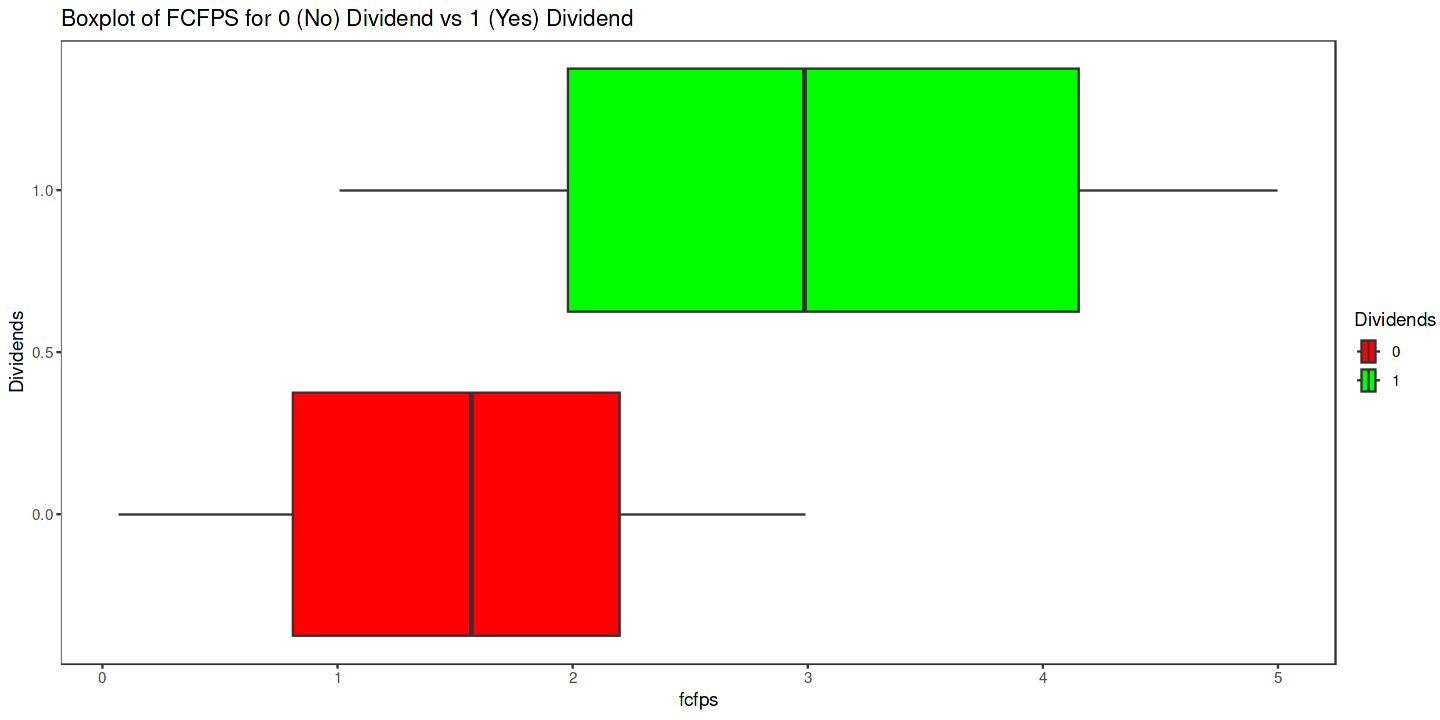

In [12]:
# Create side-by-side box plots for 0 dividend and 1 dividend
ggplot(dividend.df, aes(x = fcfps, y = dividend, fill = as.factor(dividend))) +
  geom_boxplot() +
  labs(title = "Boxplot of FCFPS for 0 (No) Dividend vs 1 (Yes) Dividend",
      x = "fcfps", y = "Dividends", fill = "Dividends") +
  theme_test() +
  scale_fill_manual(values = c("red", "green"))

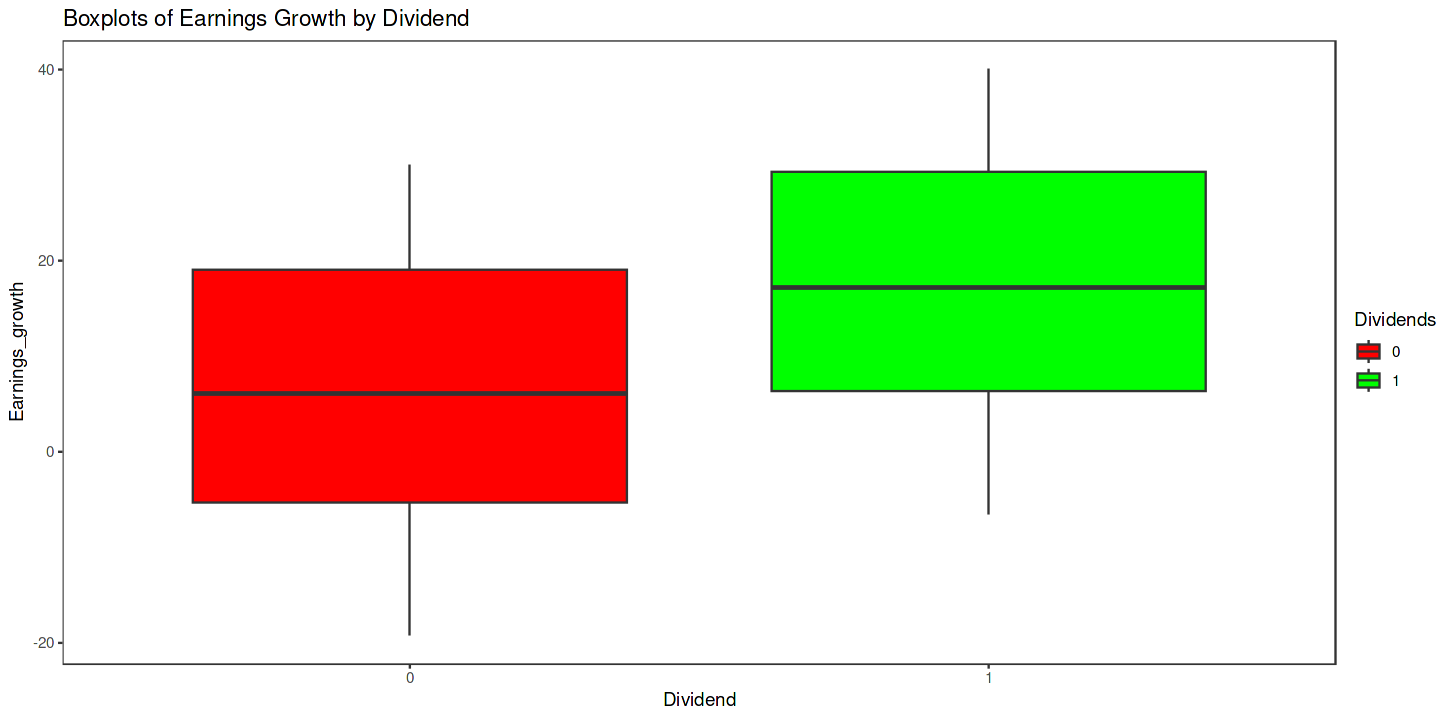

In [13]:
# Create side-by-side boxplots for dividend (x-axis) and earnings_growth (y-axis) with grey and red colors
ggplot(dividend.df, aes(x = as.factor(dividend), y = earnings_growth, fill = as.factor(dividend))) +
  geom_boxplot() +  # Add boxplots
  labs(title = "Boxplots of Earnings Growth by Dividend", x = "Dividend", 
       y = "Earnings_growth", fill = "Dividends") +  # Set plot title and axis labels
  theme_test() +  # Set plot theme
  scale_fill_manual(values = c("red", "green"))  # Set boxplot fill colors

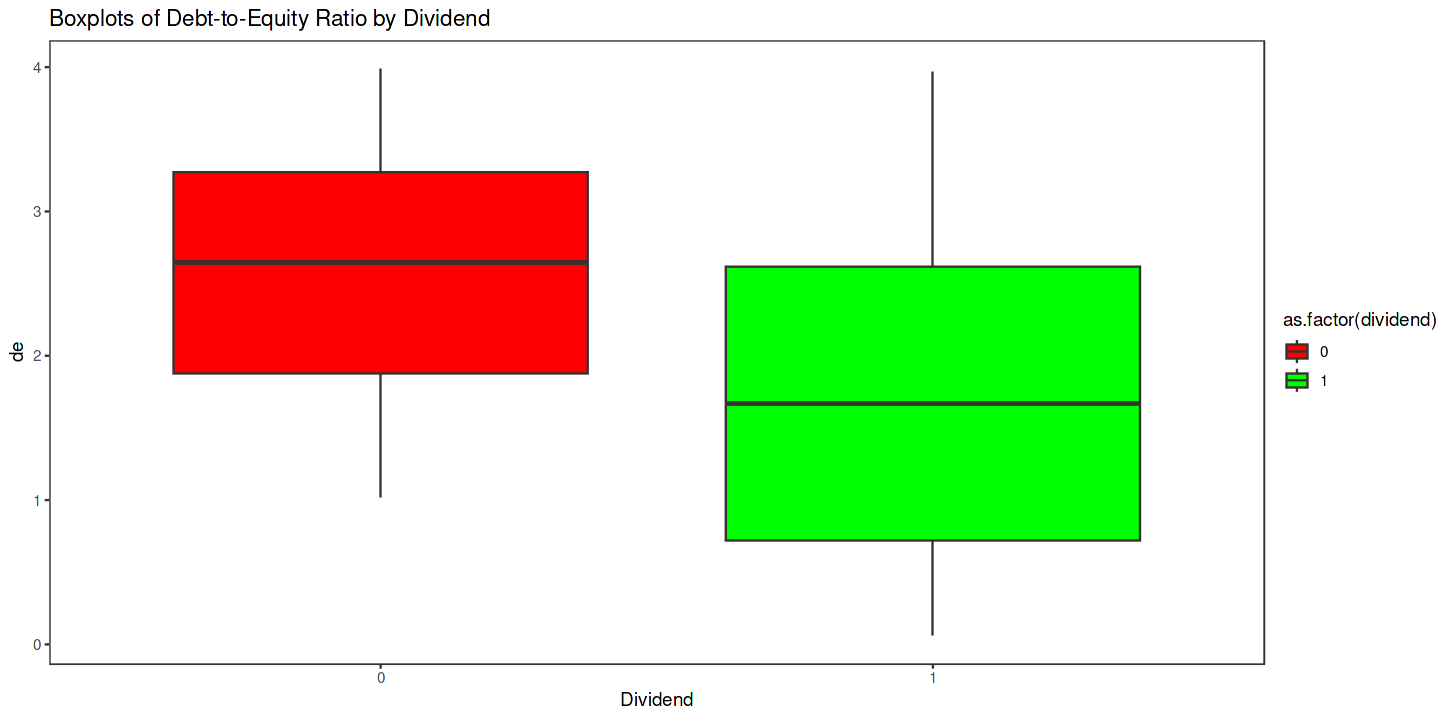

In [14]:
# Create side-by-side boxplots for dividend (x-axis) and de (y-axis) with grey and red colors
ggplot(dividend.df, aes(x = as.factor(dividend), y = de, fill = as.factor(dividend))) +
  geom_boxplot() +  # Add boxplots
  labs(title = "Boxplots of Debt-to-Equity Ratio by Dividend", x = "Dividend", y = "de") +  # Set plot title and axis labels
  theme_test() +  # Set plot theme
  scale_fill_manual(values = c("red", "green"))  # Set boxplot fill colors

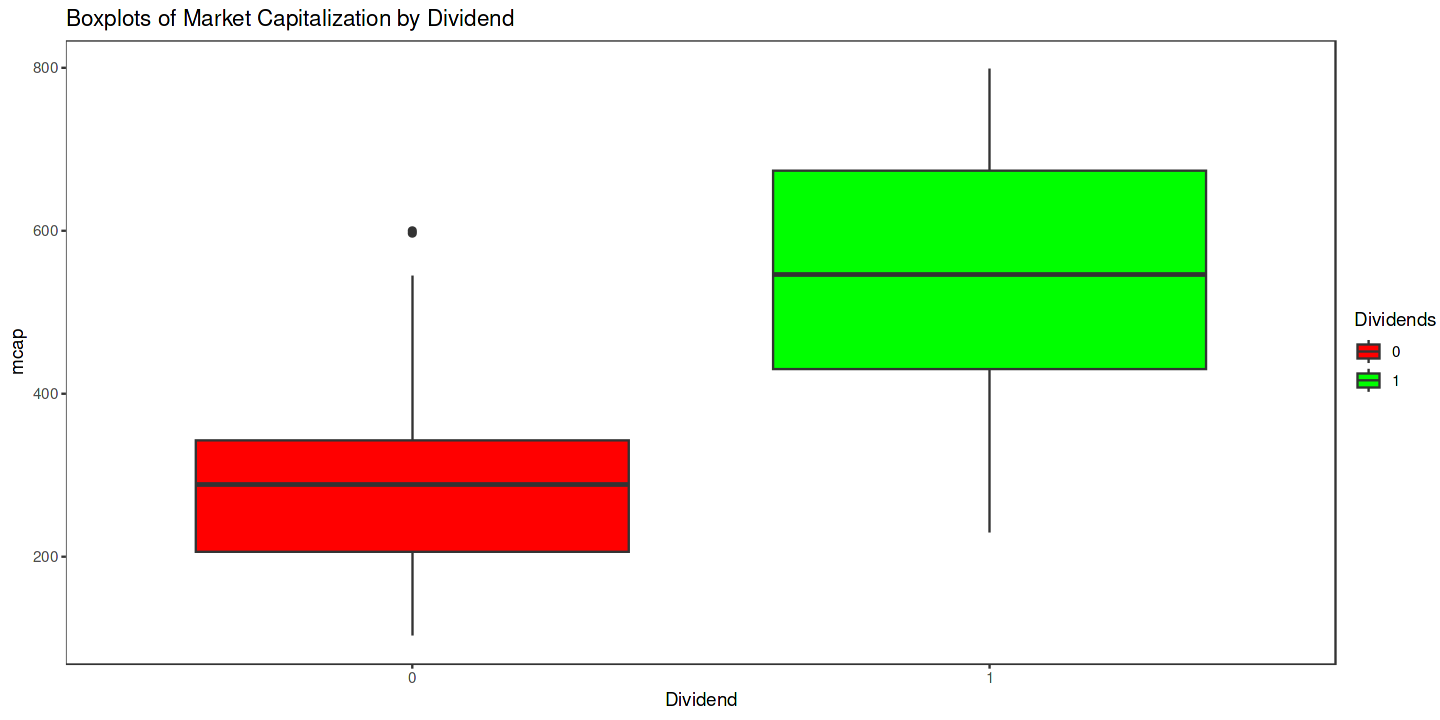

In [15]:
# Create side-by-side boxplots for dividend (x-axis) and market capitalization (y-axis) with grey and red colors
ggplot(dividend.df, aes(x = as.factor(dividend), y = mcap, fill = as.factor(dividend))) +
  geom_boxplot() +  # Add boxplots
  labs(title = "Boxplots of Market Capitalization by Dividend", x = "Dividend", 
       y = "mcap", fill = "Dividends") +  # Set plot title and axis labels
  theme_test() +  # Set plot theme
  scale_fill_manual(values = c("red", "green"))  # Set boxplot fill colors

In [16]:
# Remove the outlier
# Remove rows where mcap is greater than 580
dividend.df <- dividend.df[dividend.df$mcap <= 580, ]

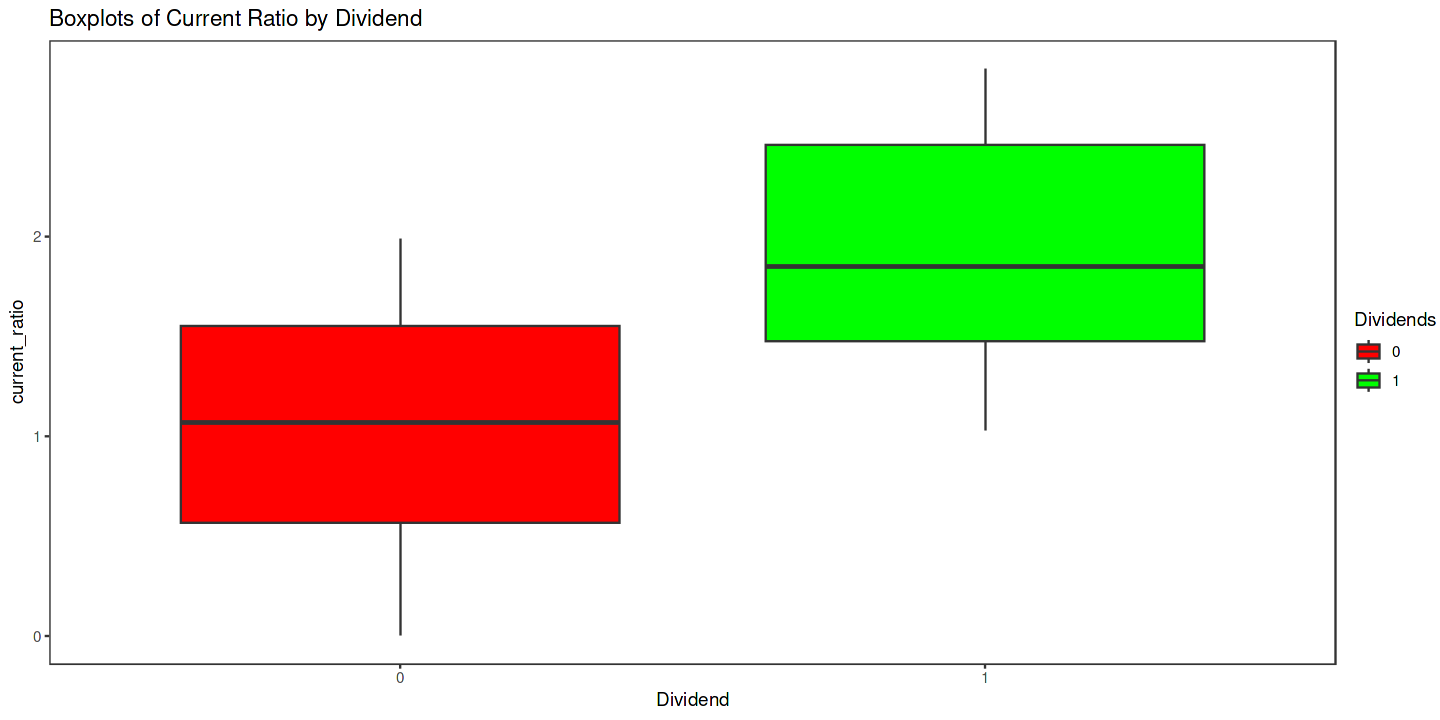

In [17]:
# Create side-by-side boxplots for dividend (x-axis) and current_ratio (y-axis) with grey and red colors
ggplot(dividend.df, aes(x = as.factor(dividend), y = current_ratio, fill = as.factor(dividend))) +
  geom_boxplot() +  # Add boxplots
  labs(title = "Boxplots of Current Ratio by Dividend", x = "Dividend", 
       y = "current_ratio", fill = "Dividends") +  # Set plot title and axis labels
  theme_test() +  # Set plot theme
  scale_fill_manual(values = c("red", "green"))  # Set boxplot fill colors

## **Modeling**

### Determine the Data Mining Task
In this case study, we aim to clasify whether a stock will have dividends. The first variable "dividend" is the response or output variable. Therefore, our task is supervised classification because we will classify the outcome using the labelled data.

### Choose the Methods
Given our task is classification, we will select an appropriate method. We will use Neural Networks for this case study.

### Clean and Transform the Data Set

In [18]:
# Normalize the data
# Max-min normalization
normalize <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}
# Run the function across the existing data
# Save the scaled dataset as maxmindf
normalized.df <- as.data.frame(lapply(dividend.df, normalize))

In [19]:
# Partition the data into 60% training and 40% testing
# Randomly select 60% of the row IDs for training
# The remaining 40% will be the testing data
# Set seed for reproducibility
set.seed(123)
training.rows <- sample(1:nrow(normalized.df), nrow(normalized.df) * 0.6)

In [20]:
# Organize all of the columns with the training row ID into the training set
training.data <- normalized.df[training.rows, ]
head(training.data)

,dividend,fcfps,earnings_growth,de,mcap,current_ratio
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14,0,0.5202559,0.25779275,0.5165394,0.5074310,0.5032139
50,0,0.5245203,0.13108677,0.5470738,0.3885350,0.7001953
118,1,0.9658849,0.26436394,0.1094148,0.5562633,0.9575007
43,0,0.1407249,0.05914069,0.4809160,0.3099788,0.1825572
154,0,0.3262260,0.12906487,0.7480916,0.6029724,0.1536242
152,1,0.2324094,0.95214827,0.6132316,0.6390658,0.3789132


In [21]:
# Assign row IDs that are not in the training set into the validation set
testing.rows <- setdiff(1:nrow(normalized.df), training.rows)
testing.data <- normalized.df[-training.rows, ]
head(testing.data)

,dividend,fcfps,earnings_growth,de,mcap,current_ratio
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0.57142857,0.0000000,0.26717557,0.9384289,0.3248896
2,1,0.57782516,0.3427127,0.03307888,0.9745223,0.6952753
3,0,0.07675906,0.5428812,0.41730280,0.6050955,0.6833458
5,1,0.93603412,0.7199663,0.83206107,0.4819533,0.9902471
9,0,0.21108742,0.7366470,0.45292621,0.1061571,0.6492616
10,1,0.65884861,0.7346251,0.70229008,0.6539278,0.4971687


### Check the Distribution

In [22]:
# Check the distribution of subscriptions rates across training and testing set
# to ensure the subsets are balanced
prop.table(table(training.data$dividend))
prop.table(table(testing.data$dividend))


        0         1 
0.6304348 0.3695652 


        0         1 
0.6129032 0.3870968 

### Build the Model

In [23]:
# Train the neural network model
# Regress the dependent variable, dividend, against all the independent variables
# Set the number of hidden layers to (2,1)
# Set linear.output to FALSE (assume the relationship is non-linear)
# Set threshold to 0.01 A change in error for an iteration less than 1% will stop the optimization of the model
nn <- neuralnet(dividend ~ ., data = training.data, hidden = c(2,1), linear.output = FALSE, threshold = 0.01)

We are creating neural network model using the neuralnet function in R. Here is the breakdown of the components:
* **nn:** This is the neural network model
* **neuralnet():** This is the function used to create the neural network model.
* **dividend ~ .:**

In [24]:
# Generate the error of the neural network and the weights between the
# inputs, hidden layers, and outputs
nn$result.matrix

error,0.509796456
reached.threshold,0.008677528
steps,560.000000000
Intercept.to.1layhid1,1.417229546
fcfps.to.1layhid1,-2.057312420
earnings_growth.to.1layhid1,0.543310736
de.to.1layhid1,0.816817777
mcap.to.1layhid1,-5.366661798
current_ratio.to.1layhid1,-0.652381891
Intercept.to.1layhid2,2.824504644
fcfps.to.1layhid2,-2.975473092


The output represents the result matrix of the neural network model **(nn$result.matrix)**. Here is the matrix representation:
* **Error:** The error value of the neural network model. It indicates how well the model fits the training data. Lower error values generally indicate better performance.
* **Reached Threshold:** Indicates whether the optimization algorithm reached the specified threshold.
* **Steps:** 

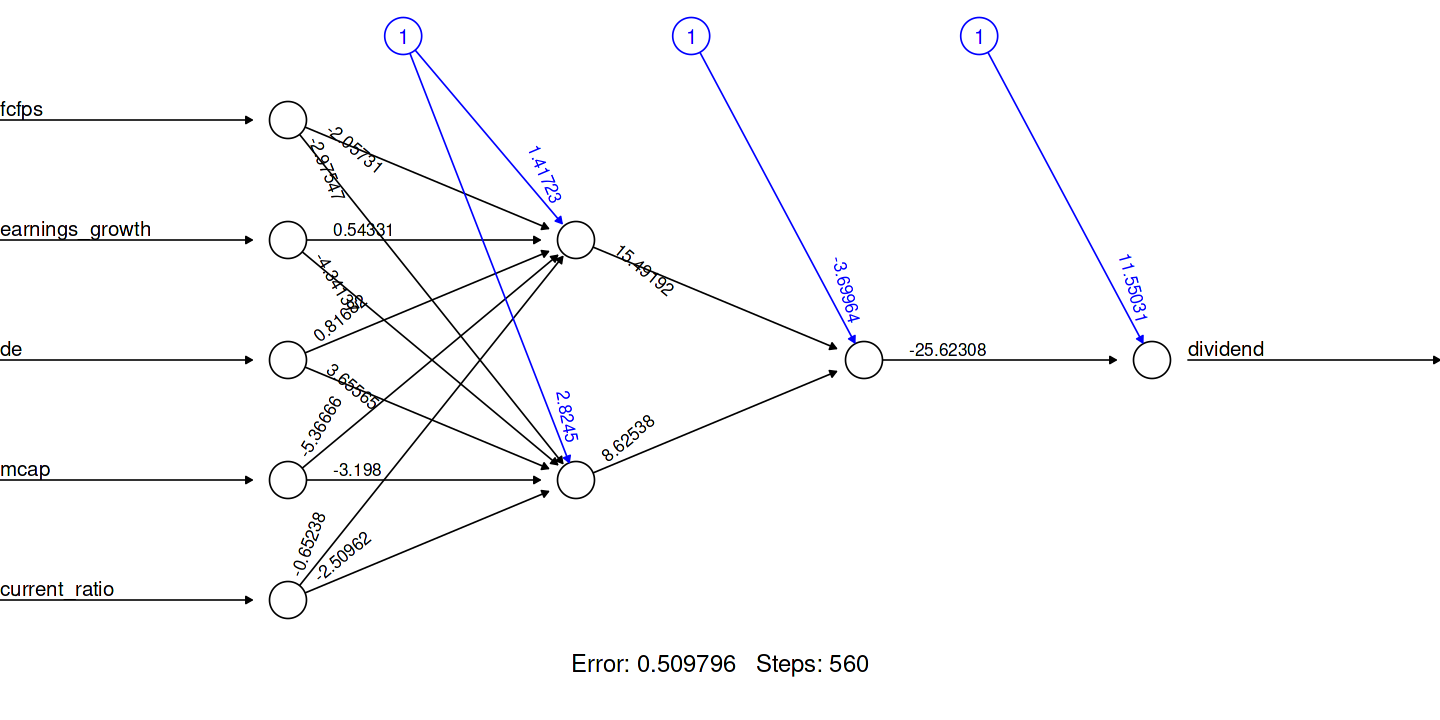

In [25]:
# Plot the neural network
plot(nn, rep = "best", mar = c(5, 10, 4, 2) + 0.5)

In [26]:
#Test the resulting output using the test data
# Subset the testing data to remove the dependent variable
temp_test <- subset(testing.data, select = c("fcfps", "earnings_growth", "de", "mcap", "current_ratio"))
# Show the temporary (temp) testing data
head(temp_test)

,fcfps,earnings_growth,de,mcap,current_ratio
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.57142857,0.0000000,0.26717557,0.9384289,0.3248896
2,0.57782516,0.3427127,0.03307888,0.9745223,0.6952753
3,0.07675906,0.5428812,0.41730280,0.6050955,0.6833458
5,0.93603412,0.7199663,0.83206107,0.4819533,0.9902471
9,0.21108742,0.7366470,0.45292621,0.1061571,0.6492616
10,0.65884861,0.7346251,0.70229008,0.6539278,0.4971687


In [27]:
# Use the compute() function to create the prediction variable
nn.results <- compute(nn, temp_test)
# Compare the predicted data to the actual data
results <- data.frame(actual = testing.data$dividend, prediction = nn.results$net.result)
# Show the comparison of the actual to the predicted values
results

,actual,prediction
,<dbl>,<dbl>
1,0,9.998908e-01
2,1,9.999805e-01
3,0,7.370089e-01
5,1,9.999386e-01
9,0,7.765365e-07
10,1,9.999246e-01
11,1,9.999695e-01
15,0,7.731715e-07
18,1,9.982840e-01


## **Evaluation**

### **Evaluate Model Performance**
Since we are evaluating Neural Network Model, we will focus on **Accuracy**, **Confusion Matrix**, **Recall (Sensitivity)**, **Precision**, **F1 Score**, and **Receiver Operating Characteristic (ROC) Curve**.
* **Accuracy:** Accuracy measures the proportion of correctly classified observations out of the total number of observations. While accuracy provides a general measure of model performance, it may not be suitable for imbalanced datasets where one class dominates the other.
* **Confusion Matrix:** A confusion matrix provides a more detailed breakdown of correct and incorrect classifications. It consists of four components: true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). Various metrics can be derived from the confusion matrix, including sensitivity, specificity, precision, and F1-score.
* **Recall (Sensitivity):** Recall measures the proportion of actual positive cases the model correctly identifies. It indicates the model's ability to detect the positive class. Recall is important when the cost of false negatives is high.
* **Precision:** Precision measures the proportion of true positive cases among all predicted positive cases. It represents the model's accuracy in predicting positive cases. Precision is instrumental when the cost of false positives is high.
* **F1-Score:** The F1-score is the harmonic mean of precision and recall (sensitivity). It provides a balanced measure of the model's performance, especially in the presence of class imbalance.
* **Receiver Operating Characteristic (ROC) Curve:** The ROC curve represents the trade-off between sensitivity and specificity across different thresholds. The area under the ROC curve (AUC-ROC) is a commonly used metric that quantifies the model's overall performance, with higher values indicating better discrimination ability.

### **Accuracy**

In [28]:
# Calculate accuracy
# Convert the predicted values to binary classes (0 or 1) based on a threshold
predicted_classes <- ifelse(nn.results$net.result > 0.5, 1, 0)
# Compute accuracy
accuracy <- mean(predicted_classes == testing.data$dividend)
cat("Accuracy:", round(accuracy, 4))

Accuracy: 0.8387

### **Confusion Matrix**

In [29]:
# Create the confusion matrix
conf_matrix <- table(testing.data$dividend, predicted_classes)
conf_matrix

   predicted_classes
     0  1
  0 28 10
  1  0 24

### **Recall (Sensitivity)**

In [30]:
# Calculate recall (sensitivity)
# True positives: predicted dividend and actual dividend
true_positives <- sum(predicted_classes == 1 & testing.data$dividend == 1)
# False negatives: actual dividend but not predicted as dividend
false_negatives <- sum(predicted_classes == 0 & testing.data$dividend == 1)
# Recall = True Positives / (True Positives + False Negatives)
recall <- true_positives / (true_positives + false_negatives)
cat("Recall (Sensitivity):", recall)

Recall (Sensitivity): 1

### **Precision**

In [31]:
# Calculate precision
# True positives: predicted dividend and actual dividend
true_positives <- sum(predicted_classes == 1 & testing.data$dividend == 1)
# False positives: predicted dividend but not actual dividend
false_positives <- sum(predicted_classes == 1 & testing.data$dividend == 0)
# Precision = True Positives / (True Positives + False Positives)
precision <- true_positives / (true_positives + false_positives)
cat("Precision:", round(precision, 4))

Precision: 0.7059

### **F1-Score**

In [32]:
# Calculate F1-score
# F1-score = 2 * (Precision * Recall) / (Precision + Recall)
f1_score <- 2 * (precision * recall) / (precision + recall)
cat("F1-score:", round(f1_score, 4))

F1-score: 0.8276

### **Receiver Operating Characterist (ROC) Curve**

Setting levels: control = 0, case = 1



Setting direction: controls < cases



AUC score: 0.9792

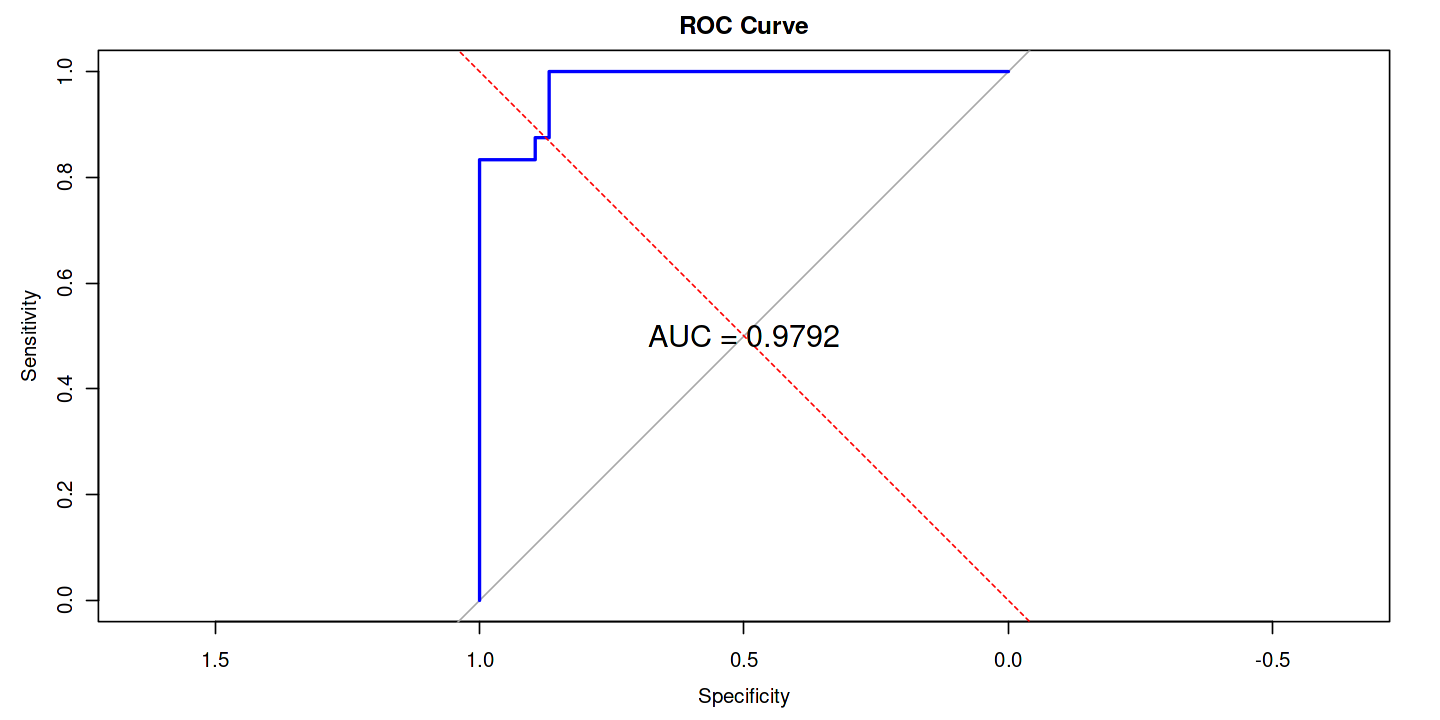

In [33]:
# Calculate ROC curve and AUC
# Extract predicted probabilities for class 1 (dividends)
# Convert predicted probabilities to numeric vector
predicted_probabilities <- as.numeric(nn.results$net.result)
# Compute ROC curve
roc_curve <- roc(testing.data$dividend, predicted_probabilities)
# Plot ROC curve
plot(roc_curve, main = "ROC Curve", col = "blue")
abline(a = 0, b = 1, lty = 2, col = "red")  # Diagonal reference line
# Calculate AUC
auc_score <- auc(roc_curve)
cat("AUC score:", round(auc_score, 4))
# Add AUC value to plot
text(0.5, 0.5, paste("AUC =", round(auc_score, 4)), adj = c(0.5, 0.5), cex = 1.5, col = "black")

### **Model Evaluation Summary**
The evaluation metrics of the neural network model for predicting stock dividends reveal strong performance:

* **Accuracy:** The model achieves an accuracy of approximately 83.87%, highlighting its capability to make correct predictions in the majority of cases.
* **Sensitivity (Recall):** A perfect score of 1.000 shows the model's excellence in identifying all positive cases (companies issuing dividends).
* **Precision:** At 0.7059, the model demonstrates a high level of precision but leaves room for improvement to reduce false positives.
* **F1-Score:** With an F1-score of 0.8276, the model strikes a good balance between precision and recall.
* **AUC:** The AUC value of 0.9792 reflects excellent discriminatory power in distinguishing between positive and negative cases.

## **Conclusion**
* The model effectively predicts dividend outcomes, excelling in identifying positive cases (sensitivity) and overall classification performance (AUC).
* There is an opportunity to enhance precision by refining the architecture and optimizing hyperparameters through backpropagation.